In [1]:
# imports
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# for the random seed
import tensorflow as tf

# set the random seeds to get reproducible results
np.random.seed(1)
tf.random.set_seed(2)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X, y = X[:1000], y[:1000]
X = X.reshape(X.shape[0], 28, 28, 1)
# Normalize
X = X / 255.
# number of unique classes
num_classes = len(np.unique(y))
y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

num_tot = y.shape[0]
num_train = y_train.shape[0]
num_test = y_test.shape[0]

y_oh = np.zeros((num_tot, num_classes))
y_oh[range(num_tot), y] = 1

y_oh_train = np.zeros((num_train, num_classes))
y_oh_train[range(num_train), y_train] = 1

y_oh_test = np.zeros((num_test, num_classes))
y_oh_test[range(num_test), y_test] = 1

In [6]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [10]:
X, y = X[:1000], y[:1000]

In [20]:
X = X.reshape(X.shape[0], 28, 28, 1)

In [17]:
len(X[1])

28

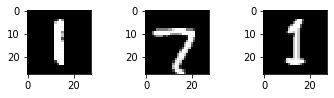

In [29]:
#Plot three data examples
from matplotlib import pyplot
for i in range(3):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # plot raw pixel data
    pyplot.imshow(np.squeeze(X_train[i]), cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [2]:
range(3)

range(0, 3)

In [3]:
print(y_oh[0],y[0])
print(y_oh[1],y[1])
print(y_oh[2],y[2])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] 5
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 0
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] 4


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD


model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=sgd)

# Train the model
model.fit(X_train, y_oh_train, batch_size=32, epochs=60)

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

Train on 800 samples
Epoch 1/60
800/800 [==============================] - 2s 2ms/sample - loss: 2.1471
Epoch 2/60
800/800 [==============================] - 0s 244us/sample - loss: 1.0427
Epoch 3/60
800/800 [==============================] - 0s 227us/sample - loss: 0.5327
Epoch 4/60
800/800 [==============================] - 0s 229us/sample - loss: 0.3538
Epoch 5/60
800/800 [==============================] - 0s 225us/sample - loss: 0.2591
Epoch 6/60
800/800 [==============================] - 0s 222us/sample - loss: 0.1993
Epoch 7/60
800/800 [==============================] - 0s 224us/sample - loss: 0.1508
Epoch 8/60
800/800 [==============================] - 0s 234us/sample - loss: 0.1309
Epoch 9/60
800/800 [==============================] - 0s 266us/sample - loss: 0.0958
Epoch 10/60
800/800 [==============================] - 0s 249us/sample - loss: 0.0758
Epoch 11/60
800/800 [==============================] - 0s 239us/sample - loss: 0.0505
Epoch 12/60
800/800 [=======================

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

### Vizualize the training. Use the model above to observe the training process. Train it for 150 epochs and then plot both "loss" and "val_loss" (i.e. loss on the valiadtion set, here the terms "validation set" and "test set" are used interchangably, but this is not always true). What is the optimal number of epochs for minimizing the test set loss

In [152]:
#SGD model
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.))

model.add(Dense(10, activation='softmax'))


sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

# Train the model
history=model.fit(X_train, y_oh_train, batch_size=32, epochs=150,validation_data=(X_test,y_oh_test))

# Evaluate performance
test_loss = model.evaluate(X_test, y_oh_test, batch_size=32)

predictions = model.predict(X_test, batch_size=32)
predictions = np.argmax(predictions, axis=1) # change encoding again
print('Accuracy:', (predictions == y_test).sum() / predictions.shape[0])

Train on 800 samples, validate on 200 samples
Epoch 1/150
800/800 [==============================] - 1s 757us/sample - loss: 2.2533 - accuracy: 0.2037 - val_loss: 2.1649 - val_accuracy: 0.3400
Epoch 2/150
800/800 [==============================] - 0s 252us/sample - loss: 1.5992 - accuracy: 0.5987 - val_loss: 0.8733 - val_accuracy: 0.7550
Epoch 3/150
800/800 [==============================] - 0s 254us/sample - loss: 0.6028 - accuracy: 0.8200 - val_loss: 0.5440 - val_accuracy: 0.8200
Epoch 4/150
800/800 [==============================] - 0s 263us/sample - loss: 0.3659 - accuracy: 0.8875 - val_loss: 0.3881 - val_accuracy: 0.8850
Epoch 5/150
800/800 [==============================] - 0s 276us/sample - loss: 0.2475 - accuracy: 0.9275 - val_loss: 0.3653 - val_accuracy: 0.8850
Epoch 6/150
800/800 [==============================] - 0s 261us/sample - loss: 0.1822 - accuracy: 0.9488 - val_loss: 0.3652 - val_accuracy: 0.8900
Epoch 7/150
800/800 [==============================] - 0s 258us/sample -

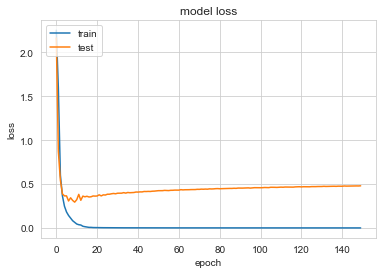

In [153]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [154]:
np.argmin(history.history['val_loss'])

9

In [156]:
history.history['val_loss'][9]

0.29390667855739594

#### <span style="color:red"> <*conclusion: the loss image indicates that the test error would be minimized with epchos at 9*> </span>


### Optimizer. Select three different optimizers and for each find the close-to-optimal hyper-parameter(s). In your answer, include a) your three choises, b) best hyper-parameters for each of the three optimizers and, c) the code that produced the results.

In [157]:
# rmsprop model
model1 = Sequential()

model1.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.))

model1.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())

model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.))

model1.add(Dense(10, activation='softmax'))

# Compile the model
model1.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])


# Train the model
callbacks = []
history2=model1.fit(X_train, y_oh_train, batch_size=32, epochs=150,callbacks=callbacks,verbose=1,validation_data=(X_test,y_oh_test))

# Evaluate performance
test_loss2 = model1.evaluate(X_test, y_oh_test, batch_size=32)

predictions2 = model1.predict(X_test, batch_size=32)
predictions2 = np.argmax(predictions2, axis=1) # change encoding again
print('Accuracy:', (predictions2 == y_test).sum() / predictions2.shape[0])

Train on 800 samples, validate on 200 samples
Epoch 1/150
800/800 [==============================] - 1s 736us/sample - loss: 1.5250 - accuracy: 0.5362 - val_loss: 1.0179 - val_accuracy: 0.6250
Epoch 2/150
800/800 [==============================] - 0s 299us/sample - loss: 0.6218 - accuracy: 0.8125 - val_loss: 0.7719 - val_accuracy: 0.7450
Epoch 3/150
800/800 [==============================] - 0s 264us/sample - loss: 0.4432 - accuracy: 0.8662 - val_loss: 0.4145 - val_accuracy: 0.8700
Epoch 4/150
800/800 [==============================] - 0s 258us/sample - loss: 0.3528 - accuracy: 0.8988 - val_loss: 0.3227 - val_accuracy: 0.8950
Epoch 5/150
800/800 [==============================] - 0s 272us/sample - loss: 0.2730 - accuracy: 0.9250 - val_loss: 0.3690 - val_accuracy: 0.8850
Epoch 6/150
800/800 [==============================] - 0s 254us/sample - loss: 0.2243 - accuracy: 0.9300 - val_loss: 0.3056 - val_accuracy: 0.9050
Epoch 7/150
800/800 [==============================] - 0s 259us/sample -

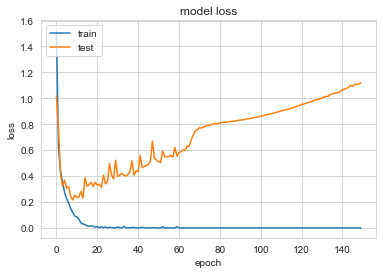

In [158]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [159]:
np.argmin(history2.history['val_loss'])

8

In [160]:
history2.history['val_loss'][8]

0.21538166165351869

In [161]:
# Adam
model3 = Sequential()

model3.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Max pooling
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.))

model3.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())

model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.))

model3.add(Dense(10, activation='softmax'))


# Compile the model
model3.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])


# Train the model
callbacks = []
history3=model3.fit(X_train, y_oh_train, batch_size=32, epochs=150,callbacks=callbacks,verbose=1,validation_data=(X_test,y_oh_test))

# Evaluate performance
test_loss3 = model3.evaluate(X_test, y_oh_test, batch_size=32)

predictions3 = model3.predict(X_test, batch_size=32)
predictions3 = np.argmax(predictions3, axis=1) # change encoding again
print('Accuracy:', (predictions3 == y_test).sum() / predictions3.shape[0])

Train on 800 samples, validate on 200 samples
Epoch 1/150
800/800 [==============================] - 0s 595us/sample - loss: 1.7934 - accuracy: 0.5163 - val_loss: 1.0688 - val_accuracy: 0.7750
Epoch 2/150
800/800 [==============================] - 0s 237us/sample - loss: 0.6749 - accuracy: 0.8075 - val_loss: 0.5631 - val_accuracy: 0.8200
Epoch 3/150
800/800 [==============================] - 0s 228us/sample - loss: 0.4361 - accuracy: 0.8725 - val_loss: 0.5297 - val_accuracy: 0.8300
Epoch 4/150
800/800 [==============================] - 0s 263us/sample - loss: 0.3347 - accuracy: 0.9100 - val_loss: 0.3684 - val_accuracy: 0.9150
Epoch 5/150
800/800 [==============================] - 0s 261us/sample - loss: 0.2568 - accuracy: 0.9337 - val_loss: 0.3275 - val_accuracy: 0.9150
Epoch 6/150
800/800 [==============================] - 0s 231us/sample - loss: 0.2064 - accuracy: 0.9425 - val_loss: 0.2727 - val_accuracy: 0.9300
Epoch 7/150
800/800 [==============================] - 0s 246us/sample -

In [162]:
np.argmin(history3.history['val_loss'])

10

In [163]:
history3.history['val_loss'][10]

0.24520298838615417

#### <span style="color:red"> <*Conclusion: The three optimizers I used are SGD, RMSProp and Adam. The following are the best hyper-parameter result for each optimizers respectively.
    *SGD: epchos=9, minimum test error=0.29390667855739594. 
    *RMSProp: epchos=8, minimum test error=0.21538166165351869.
    *Adam: epchos=10, minimum test error=0.24520298838615417.
    

### Dropout. Use the best optimizer and do hyper-parameter seach and find the best value for Dropout().

#### the RMSProp gives lowerest loss when epochs at 9. 

### In the following code, I used for loop to run a model in each dropout level

In [172]:
fraction=np.arange(0,1,0.1)
val_loss=[]
for i in fraction:
    for j in fraction:
        # rmsprop model

        
        model4 = Sequential()

        model4.add(Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)))
        # Max pooling
        model4.add(MaxPooling2D(pool_size=(2, 2)))
        model4.add(Dropout(i))

        model4.add(Conv2D(32, (3, 3), activation='relu'))
        # Max pooling
        model4.add(MaxPooling2D(pool_size=(2, 2)))
        model4.add(Flatten())

        model4.add(Dense(128, activation='relu'))
        model4.add(Dropout(j))

        model4.add(Dense(10, activation='softmax'))

        # Compile the model
        model4.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])


        # Train the model
        callbacks = []
        history4=model4.fit(X_train, y_oh_train, batch_size=32, epochs=9,callbacks=callbacks,verbose=1,validation_data=(X_test,y_oh_test))

        # Evaluate performance
        test_loss4 = model4.evaluate(X_test, y_oh_test, batch_size=32)

        val_loss.append(test_loss4)
        model4.reset_states()

Train on 800 samples, validate on 200 samples
Epoch 1/9
800/800 [==============================] - 1s 833us/sample - loss: 1.6132 - accuracy: 0.5275 - val_loss: 1.0415 - val_accuracy: 0.6350
Epoch 2/9
800/800 [==============================] - 0s 238us/sample - loss: 0.6895 - accuracy: 0.8050 - val_loss: 0.6418 - val_accuracy: 0.8300
Epoch 3/9
800/800 [==============================] - 0s 261us/sample - loss: 0.4577 - accuracy: 0.8537 - val_loss: 0.4171 - val_accuracy: 0.8700
Epoch 4/9
800/800 [==============================] - 0s 293us/sample - loss: 0.3456 - accuracy: 0.9000 - val_loss: 0.3357 - val_accuracy: 0.8800
Epoch 5/9
800/800 [==============================] - 0s 263us/sample - loss: 0.2783 - accuracy: 0.9175 - val_loss: 0.3720 - val_accuracy: 0.9100
Epoch 6/9
800/800 [==============================] - 0s 264us/sample - loss: 0.2289 - accuracy: 0.9375 - val_loss: 0.3212 - val_accuracy: 0.9150
Epoch 7/9
800/800 [==============================] - 0s 254us/sample - loss: 0.1896 

In [178]:
np.argmin(np.array(val_loss),axis=0)[0]

21

In [180]:
# the first dropout=0.2, the second dropout=0.1 gives the lowestat 0.1908

In [181]:
val_loss[21]

[0.1907823669910431, 0.93]

#### <span style="color:red"> <*Conclusion: # the first dropout=0.2 and the second dropout=0.1 gives the lowest error at 0.1908.